In [1]:
%matplotlib notebook
import matplotlib as mpl
mpl.use('pdf')

/home/cloud-user/code/source_finding/venv/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [54]:
import os
import pandas as pd
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

qs = np.linspace(0.1, 1.0, 19)
qs_str = list(map(str, qs))


dirname_template = "outputs/paper_experiment/barabasi/2-12/si/tbfs/qs/{}.time.pkl"
times = []
for q_str in qs_str:
    # print(q_str)
    path = dirname_template.format(q_str)
    df = pd.read_pickle(path)
    times.append(df['time']['mean'])   

<IPython.core.display.Javascript object>


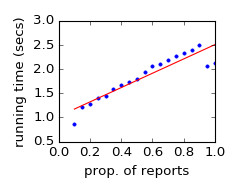

In [55]:
fig = plt.figure(figsize=(3,2.4))
fig.clf()
ax = fig.add_subplot(111)
ax.plot(qs, times, '.')
plt.plot(np.unique(qs), np.poly1d(np.polyfit(qs, times, 1))(np.unique(qs)), 'r-')
ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)
ax.set_xlabel('prop. of reports')
ax.set_ylabel('running time (secs)')
fig.tight_layout()
fig.savefig('figs/paper_experiment/scalability/prop-of-reports.pdf')

In [48]:
exps = np.arange(6, 15, 1)
print(exps)
dirname_template = "outputs/paper_experiment/barabasi/2-{}/si/tbfs/qs/0.1.time.pkl"
times = []
for exp in exps:
    # print(q_str)
    path = dirname_template.format(exp)
    df = pd.read_pickle(path)
    times.append(df['time']['mean'])   

[ 6  7  8  9 10 11 12 13 14]


<IPython.core.display.Javascript object>


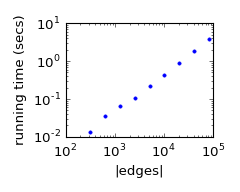

In [52]:
fig = plt.figure(figsize=(3,2.4))
fig.clf()
ax = fig.add_subplot(111)
ax.loglog(np.power(2, exps) * 5, times, '.')
# ax.locator_params(axis='x', nbins=5)
# ax.locator_params(axis='y', nbins=5)
ax.set_xlabel('|edges|')
ax.set_ylabel('running time (secs)')
fig.tight_layout()
fig.savefig('figs/paper_experiment/scalability/graph-size.pdf')